# Datawhale 智慧海洋建设-Task1 地理数据分析常用工具
在地理空间数据分析中，常会用到许多地理分析的工具，在本模块中主要是针对常用的shapely、geopandas、folium、kepler.gl、geohash等工具进行简单介绍。其中shapely和geopandas是做地理空间数据的分析很好的工具，而folium和kepler.gl是进行地理数据可视化的工具，geohash是将经纬度坐标进行数据编码的方式。通过了解不同的方法将有助于我们去思考如何在现有的工具下去做数据的分析和特征的提取功能

# 学习目标
1.了解和学习shapely和geopandas的基本功能，掌握用python中的这两个库实现几何对象之间的空间操作方法。
2.掌握folium和kepler.gl的数据可视化工具的使用。
3.学习与掌握geohash编码方法。
# 内容介绍
1.shapely
 - 空间数据模型
 - 几何对象的一些功能特性
 - Point
 - LineStrings
 - LineRings
 - Polygon
 - 几何对象之间的关系
 
2.geopandas

3.Folium

4.Kepler.gl

5.GeoHash
- 注意事项

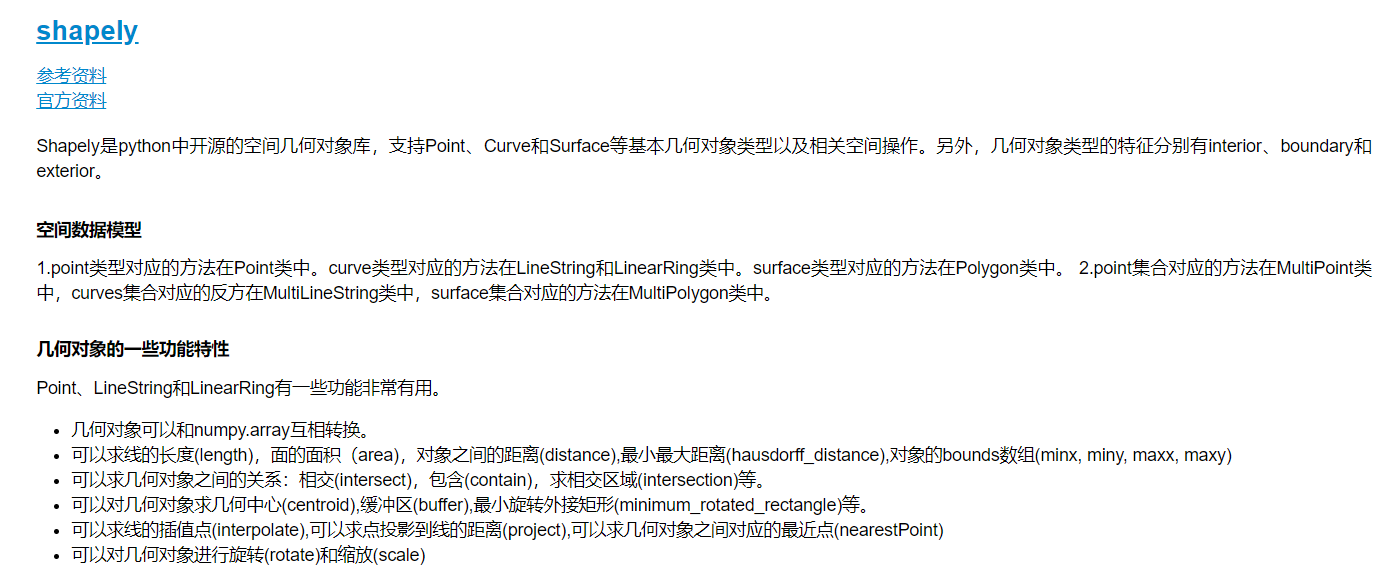

In [24]:
from shapely import geometry as geo
from shapely import wkt 
from shapely import ops
import numpy as np

In [2]:
from shapely.geometry import *

### point 
class Point（coordinates(坐标)）

In [3]:
#point 的三种赋值方式
point = geo.Point(0.5,0.5)
point_2 = geo.Point((0,0))
point_3 = geo.Point(point)
# 坐标可以通过coords或者x,y,z得到
print(list(point_3.coords))
print(point_3.x)


 
print(point_3.y)
#批量进行可视化
geo.GeometryCollection([point,point_2])
print(np.array(point))

[(0.5, 0.5)]
0.5
0.5
[0.5 0.5]


### Line strings
class LineString(coordinates)  
LineString构造函数传入参数是两个或者多个点元组

两个几何对象之间的距离:1.4142135623730951
两个几何对象之间的hausdorff_distance距离：2.8284271247461903
该几何对象的面积:0.0
该几何对象的坐标范围:(0.0, 0.0, 1.0, 1.0)
该几何对象的长度2.414213562373095
该几何对象的几何类型LineString
该几何对象的坐标系[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0)]


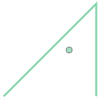

In [4]:
#示例
arr = np.array([(0,0), (1,1), (1,0)])
line = geo.LineString(arr)#等同于 line = geo.LineString([(0,0), (1,1), (1,0)]) 

print('两个几何对象之间的距离:'+ str(geo.Point(2,2).distance(line)))
print('两个几何对象之间的hausdorff_distance距离：'+ str(geo.Point(2,2).hausdorff_distance(line)))
#求点与线的最长距离
print('该几何对象的面积:' + str(line.area))
print('该几何对象的坐标范围:' + str(line.bounds))
print('该几何对象的长度' + str(line.length))
print('该几何对象的几何类型' + str(line.geom_type))
print('该几何对象的坐标系' + str(list(line.coords)))

center = line.centroid #几何中心
geo.GeometryCollection([line,center])

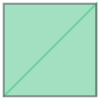

In [5]:
bbox = line.envelope#envelope可以求几何对象的最小外接矩形
geo.GeometryCollection([line,bbox])

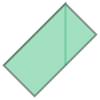

In [6]:
rect = line.minimum_rotated_rectangle #最小旋转外接矩形
geo.GeometryCollection([line,rect])

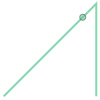

In [7]:
pt_half = line.interpolate(0.5,normalized = True)#插值
geo.GeometryCollection([line,pt_half])

In [8]:
ratio = line.project(pt_half,normalized=True)# project()方法是和interpolate方法互逆的
print(ratio)

0.5


下面是DouglasPucker算法的应用，在轨迹分析中经常会用得到

LINESTRING (0 0, 1 -0.2, 2 0.3, 3 -0.5, 5 0.2, 7 0)
LINESTRING (0 0, 2 0.3, 3 -0.5, 5 0.2, 7 0)


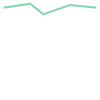

In [9]:
line1 = geo.LineString([(0,0),(1,-0.2),(2,0.3),(3,-0.5),(5,0.2),(7,0)])
line1_simplify = line1.simplify(0.4,preserve_topology = False)
#Douglas-Pucker
print(line1)
print(line1_simplify)
line1_simplify

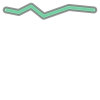

In [10]:
buffer_with_circle = line1.buffer(0.2)  #端点按照半圆扩展
geo.GeometryCollection([line1,buffer_with_circle])

#### LinearRings
class LinearRing(coordinates) LineStrings构造函数传入参数是2个或多个点元组

元组序列可以通过在第一个和最后一个索引中传递相同的值来显示关闭。否则，将第一个元组赋值到最后一个索引，从而隐式关闭序列。与LineString一样，元组序列中的重复点是允许的，但可能会导致性能上的损失，应该避免在序列中设置重复点。

3.414213562373095
0.0


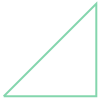

In [11]:
#from shapely.geometry.polygon import LinearRing
ring = geo.polygon.LinearRing([(0,0), (1, 1), (1, 0)])
print(ring.length)
#相比刚才的LineString 的代码示例，其长度现在是3.14，是因为其序列是闭合的
print(ring.area)
geo.GeometryCollection([ring])

#### polygon

class Polygon(shell[,hole=None])
Polygon接受两个位置参数，第一个位置参数是和LinearRing一样，是一个有序的point元组。
第二个位置参数是可选的序列，启用来指定内部的边界。

0.5
10.82842712474619
3.5
10.82842712474619
[[0. 0.]
 [0. 2.]
 [2. 2.]
 [2. 0.]
 [0. 0.]]


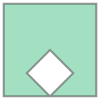

In [12]:
from shapely.geometry import Polygon
polygon1 = Polygon([(0,0),(1,1),(1,0)])
ext = [(0,0),(0,2),(2,2),(2,0),(0,0)]
int = [(1, 0), (0.5, 0.5), (1, 1), (1.5, 0.5), (1, 0)]
polygon2 = Polygon(ext, [int])
print(polygon1.area)
print(polygon2.length)
print(polygon2.area)#其面积是ext的面积减去int的面积
print(polygon2.length)#其长度是ext的长度加上int的长度
print(np.array(polygon2.exterior))  #外围坐标点
geo.GeometryCollection([polygon2])

#### 几何对象关系
一个集合对象特征分别有interior（内部）、boundary(边界),exterior(外界）. 下面的叙述直接用内部、边界和外部等名词概述

1.object.contains(other)
如果object的外部没有其他点，或者至少有一个点在该object的内部，则返回True
a.contains(b)与 b.within(a)的表达是等价的

True
False
True


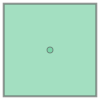

In [13]:
coords = [(0,0),(1,1)]
print(geo.LineString(coords).contains(geo.Point(0.5,0.5)))#线与点的关系
print(geo.LineString(coords).contains(geo.Point(1.0,1.0)))#因为lined的边界不是属于在该对象的内部，所以返回False
polygon1 = Polygon([(0,0),(0,2),(2,2),(2,0),(0,0)])
print(polygon1.contains(geo.Point(1.0,1.0)))#面与点的关系
#同理这个contains方法也可以扩展到面与线的关系以及面与面的关系
geo.GeometryCollection([polygon1,geo.Point(1.0,1.0)])


2.object.crosses(other)  
如果一个object与另一个object是内部相交的关系而不是包含的关系，则返回True  
3.object.disjoint(other)  
如果该对象与另一个对象的内部和边界都不相交则返回True

- object.intersects(other)  
如果该几何对象与另一个几何对象只要相交则返回True。
- object.convex_hull  
返回包含对象中所有点的最小凸多边形（凸包）

In [14]:
print(LineString(coords).crosses(LineString([(0,1),(1,0)])))
print(Point(0,0).disjoint(Point(1,1)))
print(LineString(coords).intersects(LineString([(0, 1), (1, 0)])))

True
True
True


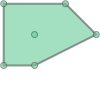

In [15]:
#在下图中即为在给定6个point之后求其凸包，并绘制出来的凸包图形
points1 = geo.MultiPoint([(0,0),(1,1),(0,2),(2,2),(3,1),(1,0)])
hull1 = points1.convex_hull
geo.GeometryCollection([hull1,points1])

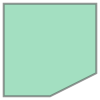

In [16]:
# object.intersection  返回对象与对象之间的交集
polygon1 = Polygon( [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)])
hull1.intersection(polygon1)

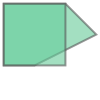

In [17]:
geo.GeometryCollection([hull1,polygon1])

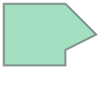

In [18]:
#返回对象与对象之间的并集
hull1.union(polygon1)

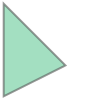

In [19]:
hull1.difference(polygon1) #面面补集

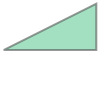

In [20]:
polygon2.difference(hull1)

6.与numpy和python数组之间的关系  
point、LineRing和LineString提供numpy数组接口，可以进行转换numpy数组

In [21]:
from shapely.geometry import asPoint,asLineString,asMultiPoint,asPolygon
import numpy as np
pa = asPoint(np.array([0.0, 0.0]))#将numpy数组转换成point格式
la = asLineString(np.array([[1.0, 2.0], [3.0, 4.0]]))#将numpy数组转换成LineString格式
ma = asMultiPoint(np.array([[1.1, 2.2], [3.3, 4.4], [5.5, 6.6]]))#将numpy数组转换成multipoint集合
pg = asPolygon(np.array([[1.1, 2.2], [3.3, 4.4], [5.5, 6.6]]))#将numpy数组转换成polygon
print(np.array(pa))#将Point转换成numpy格式

[0. 0.]



另外还有一些非常有用但是不属于某个类方法的函数，如有需要可以在官网查阅

ops.nearest_points 求最近点  
ops.split 分割线  
ops.substring 求子串  
affinity.rotate 旋转几何体  
affinity.scale 缩放几何体  
affinity.translate 平移几何体  
geopandas

In [22]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#read_file 可以读取shape文件，转化为GeoSeries和GeoDataFrame数据类型

In [23]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

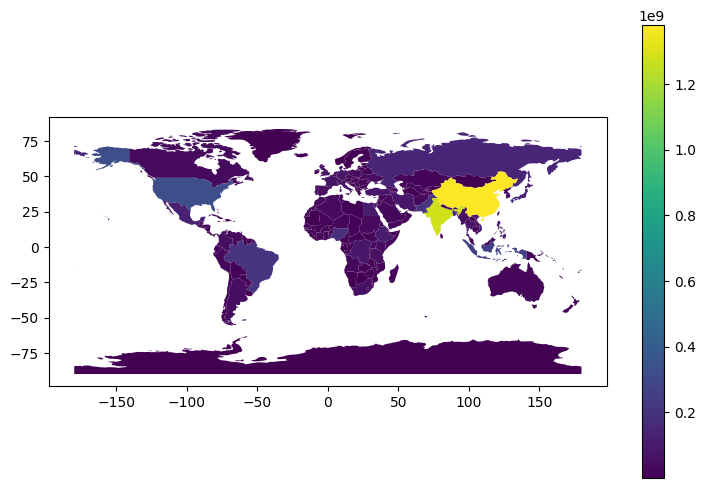

In [24]:
fig,ax = plt.subplots(figsize = (9,6),dpi = 100)
world.plot('pop_est',ax = ax,legend = True)

### Folium

folium可以满足我们平时常用的热力图、填充地图、路径图、散点标记等高频可视化场景.folium也可以通过flask让地图和我们的数据在网页上显示，极其便利。

In [12]:
import folium
import os

m = folium.Map(localtion = [39.9,116.4],zoom_start=10)
m

用Folium绘制热力图示例

In [14]:
import folium
import numpy as np
from folium.plugins import HeatMap
#先手动生成data数据，该数据格式由[纬度，经度，数值]构成
data=(np.random.normal(size=(100,3))*np.array([[1,1,1]])+np.array([[48,5,1]])).tolist()
# data

In [15]:
m=folium.Map([48,5],tiles='stamentoner',zoom_start=6)
HeatMap(data).add_to(m)
m 


folium的其他使用可以参考知乎的这篇文章，较为全面。  
https://www.zhihu.com/question/33783546


## Kepler.gl  
kepler.gl基础教程  

Kepler.gl与folium类似，也是是一个图形化的数据可视化工具，基于Uber的大数据可视化开源项目deck.gl创建的demo app。目前支持3种数据格式：CSV、JSON、GeoJSON。  

Kepler.gl官网提供了可视化图形案例，分别是Arc（弧）、Line（线）、Hexagon（六边形）、Point（点）、Heatmap（等高线图）、GeoJSON、Buildings（建筑）。
 
下面用本赛题的数据进行简单的数据处理和基本的kepler.gl的使用

In [2]:
import pandas as pd 
import geopandas as gpd
from pyproj import Proj 
from keplergl import KeplerGl
from tqdm import tqdm
import os 
import matplotlib.pyplot as plt
import shapely
import numpy as np
from datetime import datetime  
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimSun']    # 指定默认字体为新宋体。
plt.rcParams['axes.unicode_minus'] = False      # 解决保存图像时 负号'-' 显示为方块和报错的问题。

In [3]:
#获取文件夹中的数据
def get_data(file_path,model):
    assert model in ['train', 'test'], '{} Not Support this type of file'.format(model)
    paths = os.listdir(file_path)
#     print(len(paths))
    tmp = []
    for t in tqdm(range(len(paths))):
        p = paths[t]
        with open('{}/{}'.format(file_path, p), encoding='utf-8') as f:
            next(f)
            for line in f.readlines():
                tmp.append(line.strip().split(','))
    tmp_df = pd.DataFrame(tmp)
    if model == 'train':
        tmp_df.columns = ['ID', 'lat', 'lon', 'speed', 'direction', 'time', 'type']
    else:
        tmp_df['type'] = 'unknown'
        tmp_df.columns = ['ID', 'lat', 'lon', 'speed', 'direction', 'time', 'type']
    tmp_df['lat'] = tmp_df['lat'].astype(float)
    tmp_df['lon'] = tmp_df['lon'].astype(float)
    tmp_df['speed'] = tmp_df['speed'].astype(float)
    tmp_df['direction'] = tmp_df['direction'].astype(float)#如果该行代码运行失败，请尝试更新pandas的版本
    return tmp_df
# 平面坐标转经纬度，供初赛数据使用
# 选择标准为NAD83 / California zone 6 (ftUS) (EPSG:2230)，查询链接：https://mygeodata.cloud/cs2cs/
def transform_xy2lonlat(df):
    x = df['lat'].values
    y = df['lon'].values
    p=Proj('+proj=lcc +lat_1=33.88333333333333 +lat_2=32.78333333333333 +lat_0=32.16666666666666 +lon_0=-116.25 +x_0=2000000.0001016 +y_0=500000.0001016001 +datum=NAD83 +units=us-ft +no_defs ')
    df['lon'], df['lat'] = p(y, x, inverse=True)
    return df  
#修改数据的时间格式
def reformat_strtime(time_str=None, START_YEAR="2019"):
    """Reformat the strtime with the form '08 14' to 'START_YEAR-08-14' """
    time_str_split = time_str.split(" ")
    time_str_reformat = START_YEAR + "-" + time_str_split[0][:2] + "-" + time_str_split[0][2:4]
    time_str_reformat = time_str_reformat + " " + time_str_split[1]
#     time_reformat=datetime.strptime(time_str_reformat,'%Y-%m-%d %H:%M:%S')
    return time_str_reformat
#计算两个点的距离
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km * 1000

def compute_traj_diff_time_distance(traj=None):
    """Compute the sampling time and the coordinate distance."""
    # 计算时间的差值
    time_diff_array = (traj["time"].iloc[1:].reset_index(drop=True) - traj[
        "time"].iloc[:-1].reset_index(drop=True)).dt.total_seconds() / 60

    # 计算坐标之间的距离
    dist_diff_array = haversine_np(traj["lon"].values[1:],  # lon_0
                                   traj["lat"].values[1:],  # lat_0
                                   traj["lon"].values[:-1], # lon_1
                                   traj["lat"].values[:-1]  # lat_1
                                   )

    # 填充第一个值
    time_diff_array = [time_diff_array.mean()] + time_diff_array.tolist()
    dist_diff_array = [dist_diff_array.mean()] + dist_diff_array.tolist()
    traj.loc[list(traj.index),'time_array'] = time_diff_array
    traj.loc[list(traj.index),'dist_array'] = dist_diff_array
    return traj 

#对轨迹进行异常点的剔除
def assign_traj_anomaly_points_nan(traj=None, speed_maximum=23,
                                   time_interval_maximum=200,
                                   coord_speed_maximum=700):
    """Assign the anomaly points in traj to np.nan."""
    def thigma_data(data_y,n): 
        data_x =[i for i in range(len(data_y))]
        ymean = np.mean(data_y)
        ystd = np.std(data_y)
        threshold1 = ymean - n * ystd
        threshold2 = ymean + n * ystd
        judge=[]
        for data in data_y:
            if (data < threshold1)|(data> threshold2):
                judge.append(True)
            else:
                judge.append(False)
        return judge
    # Step 1: The speed anomaly repairing
    is_speed_anomaly = (traj["speed"] > speed_maximum) | (traj["speed"] < 0)
    traj["speed"][is_speed_anomaly] = np.nan

    # Step 2: 根据距离和时间计算速度
    is_anomaly = np.array([False] * len(traj))
    traj["coord_speed"] = traj["dist_array"] / traj["time_array"]
    
    # Condition 1: 根据3-sigma算法剔除coord speed以及较大时间间隔的点
    is_anomaly_tmp = pd.Series(thigma_data(traj["time_array"],3)) | pd.Series(thigma_data(traj["coord_speed"],3))
    is_anomaly = is_anomaly | is_anomaly_tmp
    is_anomaly.index=traj.index
    # Condition 2: 轨迹点的3-sigma异常处理
    traj = traj[~is_anomaly].reset_index(drop=True)
    is_anomaly = np.array([False] * len(traj))

    if len(traj) != 0:
        lon_std, lon_mean = traj["lon"].std(), traj["lon"].mean()
        lat_std, lat_mean = traj["lat"].std(), traj["lat"].mean()
        lon_low, lon_high = lon_mean - 3 * lon_std, lon_mean + 3 * lon_std
        lat_low, lat_high = lat_mean - 3 * lat_std, lat_mean + 3 * lat_std

        is_anomaly = is_anomaly | (traj["lon"] > lon_high) | ((traj["lon"] < lon_low))
        is_anomaly = is_anomaly | (traj["lat"] > lat_high) | ((traj["lat"] < lat_low))
        traj = traj[~is_anomaly].reset_index(drop=True)
    return traj, [len(is_speed_anomaly) - len(traj)]

In [4]:
df=get_data(r'E:\ML_data\wiseOcean\hy_round1_train_20200102','train')

100%|████████████████████████████████████████████████████████████| 7000/7000 [00:05<00:00, 1184.00it/s]


In [5]:
df=transform_xy2lonlat(df)
df['time']=df['time'].apply(reformat_strtime)
df['time']=df['time'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [6]:
#读取github的数据
DF=pd.read_csv(r'E:\ML_data\wiseOcean\DF.csv')

由于数据量过大，如果直接将轨迹异常点剔除的数据用kepler.gl展示则在程序运行时会出现卡顿，或者无法运行的情况，此时可尝试利用geopandas对数据利用douglas-peucker算法进行简化。有效简化后的矢量数据可以在不损失太多视觉感知到的准确度的同时，带来巨大的性能提升。

化简前数据长度：397
化简后数据长度：163


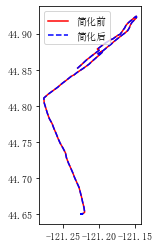

In [23]:
#douglas-peucker案例，由该案例可以看出针对相同ID的轨迹，可以先用geopandas将其进行简化和数据压缩
line= shapely.geometry.LineString(np.array(df[df['ID']=='10'][['lon','lat']]))
ax=gpd.GeoSeries([line]).plot(color='red')
ax = gpd.GeoSeries([line]).simplify(tolerance=0.000000001).plot(color='blue', 
                                                        ax=ax,
                                                        linestyle='--')
LegendElement = [plt.Line2D([], [], color='red', label='简化前'),
                 plt.Line2D([], [], color='blue', linestyle='--', label='简化后')]

# 将制作好的图例映射对象列表导入legend()中，并配置相关参数
ax.legend(handles = LegendElement, 
          loc='upper left', 
          fontsize=10)
# ax.set_ylim((-2.1, 1))
# ax.axis('off')
print('化简前数据长度：'+str(len(np.array(gpd.GeoSeries([line])[0]))))
print('化简后数据长度：'+str(len(np.array(gpd.GeoSeries([line]).simplify(tolerance=0.000000001)[0]))))

In [8]:
#定义数据简化函数。即通过shapely库将经纬度转换成LineString格式
#然后放入GeoSeries数据结构中并进行简化，最后再将所有数据放入GeoDataFrame中
def simplify_dataframe(df):
    line_list=[]
    for i in tqdm(dict(list(df.groupby('ID')))):
        line_dict={}
        lat_lon=dict(list(df.groupby('ID')))[i][['lon','lat']]
        line=shapely.geometry.LineString(np.array(lat_lon))
        line_dict['ID']=dict(list(df.groupby('ID')))[i].iloc[0]['ID']
        line_dict['type']=dict(list(df.groupby('ID')))[i].iloc[0]['type']  
        line_dict['geometry']=gpd.GeoSeries([line]).simplify(tolerance=0.000000001)[0]
        line_list.append(line_dict)
    return gpd.GeoDataFrame(line_list)

In [ ]:
df_gpd_change=simplify_datframe(DF)

  0%|                                                              | 12/7000 [00:27<4:24:01,  2.27s/it]

## GeoHash
参考文献：https://blog.csdn.net/zhufenghao/article/details/85568340
在对于经纬度进行数据分析和特征提取时常用到的是GeoHash编码，该编码方式可以将地理经纬度坐标编码为由字母和数字所构成的短字符串，它具有如下特性：

层级空间数据结构，将地理位置用矩形网格划分，同一网格内地理编码相同
只要编码长度足够长，可以表示任意精度的地理位置坐标
编码前缀匹配的越长，地理位置越邻近。
下图对北京中关村软件园附近进行6位的GeoHash编码结果，9个网格相互邻近且具有相同的前缀.

In [9]:
df_gpd_change=pd.read_pickle(r'E:\ML_data\wiseOcean\df_gpd_change.pkl')

ValueError: unsupported pickle protocol: 5

In [ ]:
map1.add_data(data=df_gpd_change,name='data')
#当运行该代码后，下面会有一个kepler.gl使用说明的链接，可以根据该链接进行学习参考
map1

## GeoHash

参考文献：https://blog.csdn.net/zhufenghao/article/details/85568340
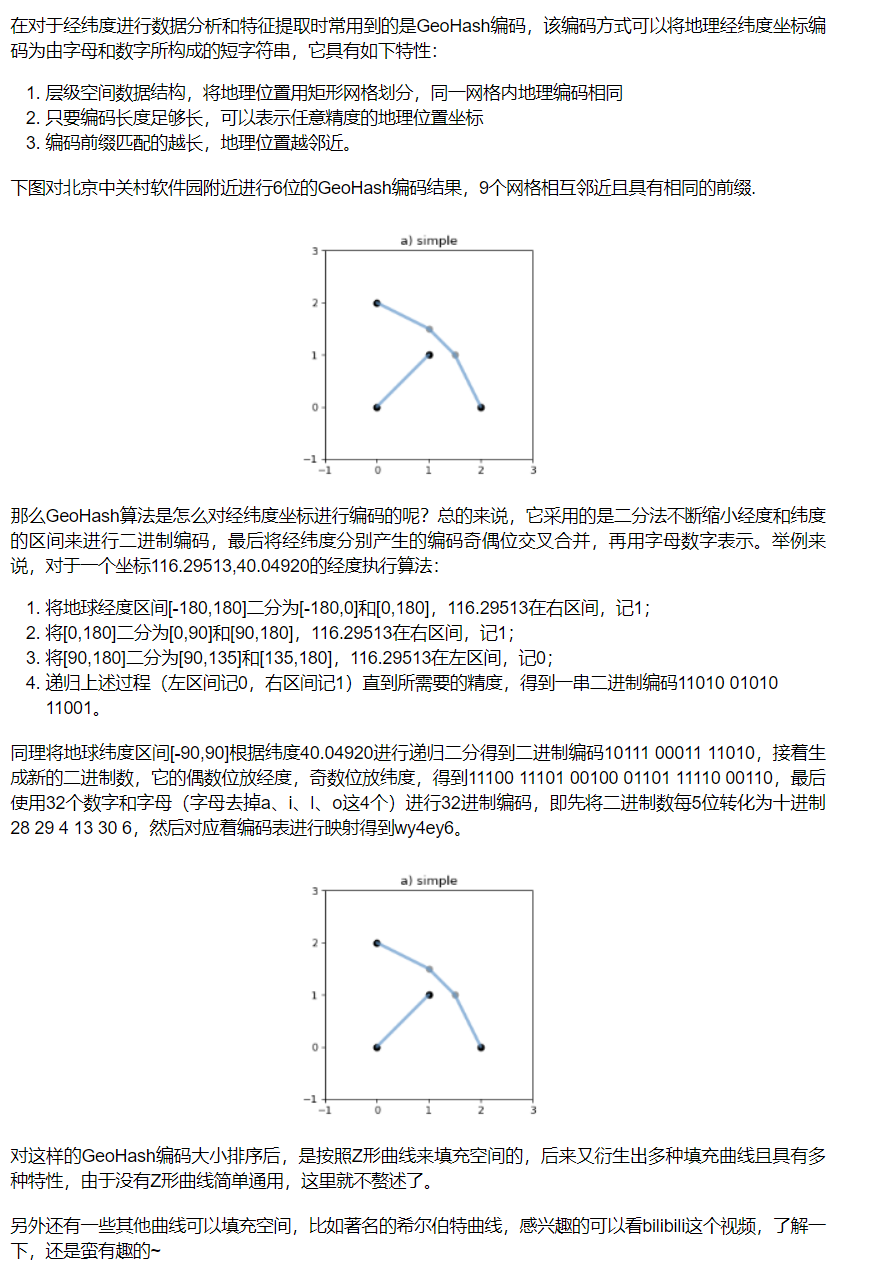
https://www.bilibili.com/video/BV1Sf4y147J9?from=search&seid=12367619856156226126

In [10]:
# reference: https://github.com/vinsci/geohash
def geohash_encode(latitude, longitude, precision=12):
    """
    Encode a position given in float arguments latitude, longitude to
    a geohash which will have the character count precision.
    """
    lat_interval, lon_interval = (-90.0, 90.0), (-180.0, 180.0)
    base32 = '0123456789bcdefghjkmnpqrstuvwxyz'
    geohash = []
    bits = [16, 8, 4, 2, 1]
    bit = 0
    ch = 0
    even = True
    while len(geohash) < precision:
        if even:
            mid = (lon_interval[0] + lon_interval[1]) / 2
            if longitude > mid:
                ch |= bits[bit]
                lon_interval = (mid, lon_interval[1])
            else:
                lon_interval = (lon_interval[0], mid)
        else:
            mid = (lat_interval[0] + lat_interval[1]) / 2
            if latitude > mid:
                ch |= bits[bit]
                lat_interval = (mid, lat_interval[1])
            else:
                lat_interval = (lat_interval[0], mid)
        even = not even
        if bit < 4:
            bit += 1
        else:
            geohash += base32[ch]
            bit = 0
            ch = 0
    return ''.join(geohash)

In [11]:
DF[DF['ID']==1].apply(lambda x: geohash_encode(x['lat'], x['lon'], 7), axis=1)

1873158    9rc76bv
1873159    9rc76cq
1873160    9rc76fw
1873161    9rc76gn
1873162    9rc76gy
            ...   
1873517    9rc7xnv
1873518    9rc7xnv
1873519    9rc7xnv
1873520    9rc7xnv
1873521    9rc7xnv
Length: 364, dtype: object

## 注意事项
GeoHash的主要价值在于将二维的经纬度坐标信息编码到了一维的字符串中，在做地理位置索引时只需要匹配字符串即可，便于缓存、信息压缩。在使用大数据工具（例如Spark）进行数据挖掘聚类时，GeoHash显得更加便捷和高效。

但是使用GeoHash还有一些注意事项：

    1、由于GeoHash使用Z形曲线来顺序填充空间的，而Z形曲线在拐角处会有突变，这表现在有些相邻的网格的编码前缀比其他网格相差较多，因此利用前缀匹配可以找到一部分邻近的区域，但同时也会漏掉一些。 
    2、一个网格内部所有点会共用一个GeoHash值，在网格的边缘点会匹配到可能较远但是GeoHash值相同的点，而本来距离较近的点却没有匹配到。这种问题可以这样解决：适当增加GeoHash编码长度，并使用周围的8个近邻编码来参与，因为往往只使用一个GeoHash编码可能会有严重风险！

## 作业
1.尝试去使用kepler.gl可视化来分析不同类型船舶AIS数据的分布情况，并为接下来的特征工程的提取建立基础   
进阶作业：  
2.在这个模块中，我们介绍了各种库以及他们常用的方法。如果可以，请同学们尝试在原有剔除异常点的数据（DF）中保留douglas-peucker算法所识别的关键点的数据，删除douglas-peucker未保存的数据，并尝试对这些坐标点进行geohash编码

In [26]:
DF = pd.read_csv(r'E:\ML_data\wiseOcean\DF.csv')